## Data Import via yfinance

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U matplotlib

Requirement already up-to-date: matplotlib in /opt/anaconda3/lib/python3.8/site-packages (3.3.3)
Note: you may need to restart the kernel to use updated packages.


## Movement of Boeing (BA) Stock [chosen from the S&P 500 Index] from the period 1st Jan 2020 to 31st Oct 2020

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [4]:
initial_data = yf.download("BA", start="2020-01-01", end="2020-10-31")

[*********************100%***********************]  1 of 1 completed


In [5]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,328.549988,333.350006,327.700012,333.320007,331.348572,4544400
2020-01-03,330.630005,334.890015,330.299988,332.760010,330.791901,3875900
2020-01-06,329.299988,334.859985,327.880005,333.739990,331.766083,5355000
2020-01-07,334.260010,344.190002,330.709991,337.279999,335.285156,9898600
2020-01-08,332.399994,334.029999,329.600006,331.369995,329.410095,8239200


In [6]:
initial_data['Adj Close'].head()

Date
2020-01-02    331.348572
2020-01-03    330.791901
2020-01-06    331.766083
2020-01-07    335.285156
2020-01-08    329.410095
Name: Adj Close, dtype: float64

In [7]:
data = initial_data['Adj Close']

In [8]:
data.head()

Date
2020-01-02    331.348572
2020-01-03    330.791901
2020-01-06    331.766083
2020-01-07    335.285156
2020-01-08    329.410095
Name: Adj Close, dtype: float64

In [9]:
data.tail()

Date
2020-10-26    160.830002
2020-10-27    155.240005
2020-10-28    148.139999
2020-10-29    148.289993
2020-10-30    144.389999
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

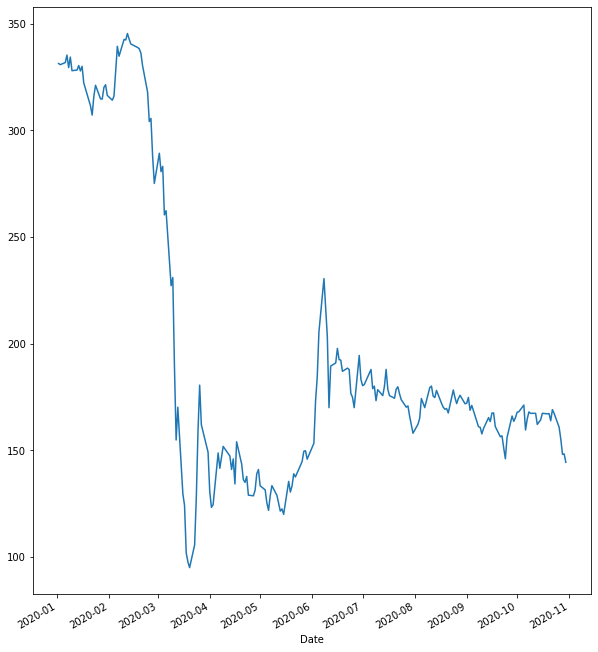

In [10]:
data.plot(figsize=(10, 12), subplots=True)

In [11]:
data.describe().round(2)

count    211.00
mean     194.73
std       68.89
min       95.01
25%      151.61
50%      170.20
75%      193.51
max      345.40
Name: Adj Close, dtype: float64

## Plotting the movement of the stock over this time period and calculating its volatility

###### Logarithmic Returns

In [12]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [13]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

Date
2020-01-02       NaN
2020-01-03   -0.0017
2020-01-06    0.0029
2020-01-07    0.0106
2020-01-08   -0.0177
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

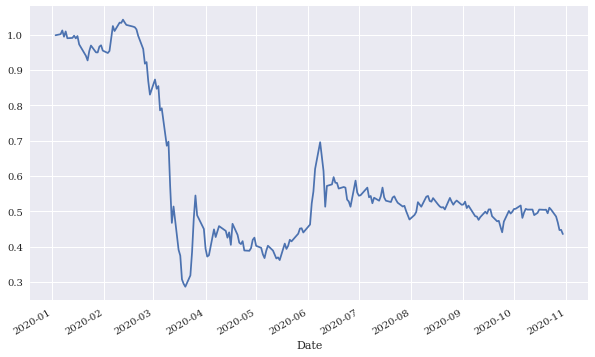

In [14]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6))

###### Historical Volatility

In [15]:
S = data[-1]
print('The spot price is $', round(S,2), '.')

The spot price is $ 144.39 .


In [16]:
log_return = np.log(data / data.shift(1))
vol_h = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 92.83 %


###### Market Volatility

In [17]:
VIX = yf.download("^VIX", start="2020-01-01", end="2020-10-31")

[*********************100%***********************]  1 of 1 completed


In [18]:
VIX

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,13.460000,13.720000,12.420000,12.470000,12.470000,0
2020-01-03,15.010000,16.200001,13.130000,14.020000,14.020000,0
2020-01-06,15.450000,16.389999,13.540000,13.850000,13.850000,0
2020-01-07,13.840000,14.460000,13.390000,13.790000,13.790000,0
2020-01-08,15.160000,15.240000,12.830000,13.450000,13.450000,0
...,...,...,...,...,...,...
2020-10-26,29.379999,33.680000,29.219999,32.459999,32.459999,0
2020-10-27,32.040001,33.770000,31.850000,33.349998,33.349998,0
2020-10-28,34.689999,40.770000,34.680000,40.279999,40.279999,0


In [19]:
print('The market volatility is', round(VIX['Adj Close'][-1],2), '% .')

The market volatility is 38.02 % .


## Designing of a Financial Derivative using the 'Binomial Tree' and 'Monte Carlo Simulation' methods

In [20]:
import numpy as np
import os

In [21]:
S0 = 144.39             # Stock Price
K = 150                 # Strike Price
T = 1.0                 # Time to Maturity 
r = 0.0093              # Risk Free Rate 
sig = 0.928             # Volatility
N = 3                   # Number of Periods or Number of Time Steps  
payoff = "put"          # Payoff  

### Binomial Tree

#### Step 1: Create the Binomial Price Tree

In [22]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # Up Factor
d = 1.0 / u                                   # Down Factor

In [23]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [24]:
S

array([[144.39      , 246.73108573, 421.60972827, 720.43926871],
       [  0.        ,  84.49876528, 144.39      , 246.73108573],
       [  0.        ,   0.        ,  49.44969412,  84.49876528],
       [  0.        ,   0.        ,   0.        ,  28.93855597]])

In [25]:
a = np.exp(r * dT)    # Risk Free Compound Return
p = (a - d)/ (u - d)  # Risk Neutral Up Probability
q = 1.0 - p           # Risk Neutral Down Probability
p

0.3719329050175016

#### Step 2: Find Option Value at Each Final Node

In [26]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  65.50123472],
       [  0.        ,   0.        ,   0.        , 121.06144403]])

#### Step 3: Find Option Value at Earlier Nodes

###### European Option

In [27]:
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 58.27894322,  25.67845812,   0.        ,   0.        ],
       [  0.        ,  77.87261126,  41.01183625,   0.        ],
       [  0.        ,   0.        , 100.08602589,  65.50123472],
       [  0.        ,   0.        ,   0.        , 121.06144403]])

In [28]:
print('European ' + payoff, str( V[0,0]))

European put 58.278943217296806


### Monte Carlo Simulation

In [29]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [30]:
T = 1
r = 0.0093
sigma = 0.928
S0 = 144.39
K = 150

In [31]:
S = mcs_simulation_np(1000)

In [32]:
S = np.transpose(S)
S

array([[144.39      , 139.86564258, 138.57659414, ..., 288.71607642,
        287.38856249, 282.16200219],
       [144.39      , 139.84162454, 138.476487  , ...,  35.40961155,
         34.87406669,  32.53091577],
       [144.39      , 146.48147289, 140.76970628, ..., 142.65184206,
        136.40654999, 136.47504992],
       ...,
       [144.39      , 141.13770835, 134.32194948, ...,  59.40709625,
         58.27684211,  59.08933715],
       [144.39      , 138.75442186, 141.29085396, ..., 883.24280476,
        879.48062431, 893.96705582],
       [144.39      , 150.60489865, 145.59779922, ...,  65.16551683,
         64.77720763,  64.45113546]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

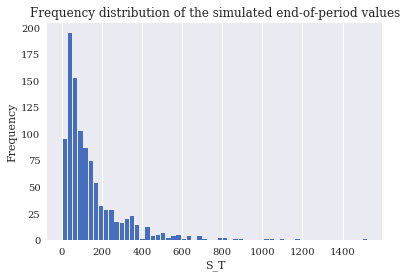

In [33]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0039a6',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

In [34]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European Put', str(p))

European Put 55.21055274304538


In [35]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European Call', str(c))

European Call 51.07401038871521


## Use of 5 Greeks to Analyse Boeing's Risk Management

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

###### Option Value

In [37]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: Spot Price
    #K: Strike Price
    #T: Time to Maturity
    #r: Risk Free Rate
    #q: Continuous Dividend Yield
    #vol: Volatility of Underlying Asset
    #payoff: Call or Put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [38]:
euro_option_bsm(144.39, 150, 1, 0.0093, 0.0188, 0.928, 'call')

48.480051751198346

In [39]:
euro_option_bsm(144.39, 150, 1, 0.0093, 0.0188, 0.928, 'put')

55.3906929934395

In [40]:
S = np.linspace(50,150,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bsm(S[i],150, 1, 0.0093, 0.0188, 0.928,'call')
    Put [i] = euro_option_bsm(S[i],150, 1, 0.0093, 0.0188, 0.928,'put')

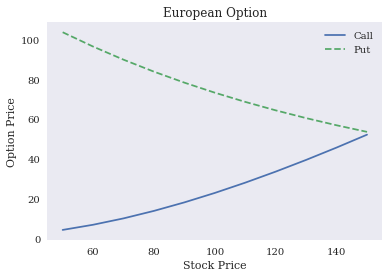

In [41]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call','Put'])

### Delta

In [42]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [43]:
delta(144.39, 150, 1, 0.0093, 0.188, 0.928, 'call')

0.4897893722866587

In [44]:
delta(144.39, 150, 1, 0.0093, 0.188, 0.928, 'put')

-0.3388253349460219

In [45]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 150, 1, 0.0093, 0.0188, 0.928, 'call')
    Delta_Put [i] = delta(S[i], 150, 1, 0.0093, 0.0188, 0.928, 'put')

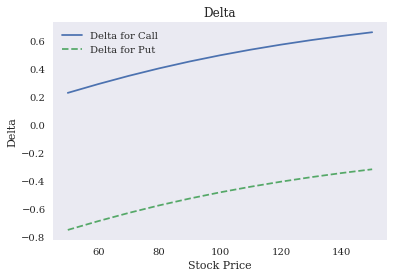

In [46]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

### Gamma

In [47]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * T)
    
    return gamma

In [48]:
gamma(144.39, 150, 1, 0.0093, 0.188, 0.928, 'call')

0.002872518889720304

In [49]:
gamma(144.39, 150, 1, 0.0093, 0.188, 0.928, 'put')

0.002872518889720304

In [50]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 150, 1, 0.0093, 0.0188, 0.928, 'call')

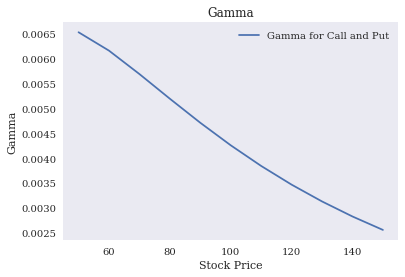

In [51]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

### Speed

In [52]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * T) * (d1 + vol * np.sqrt(T))
    
    return speed

In [53]:
speed(144.39, 150, 1, 0.0093, 0.0188, 0.928, 'call')

2.684851393098335e-05

In [54]:
speed(144.39, 150, 1, 0.0093, 0.0188, 0.928, 'put')

2.684851393098335e-05

In [55]:
S = np.linspace(50,150,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 150, 1, 0.0093, 0.0188, 0.928, 'call')

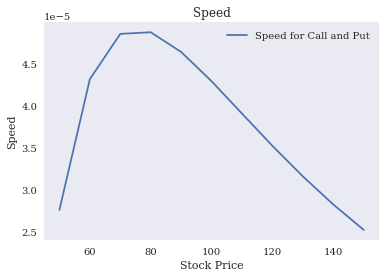

In [56]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

### Theta

In [57]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [58]:
theta(144.39, 150, 1, 0.0093, 0.0188, 0.928, 'call')

22.749502973559032

In [59]:
theta(144.39, 150, 1, 0.0093, 0.0188, 0.928, 'put')

24.146493459166898

In [60]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(144.39, 150, T[i], 0.0093, 0.0188, 0.928, 'call')
    Theta_Put [i] = theta(144.39, 150, T[i], 0.0093, 0.0188, 0.928, 'put')

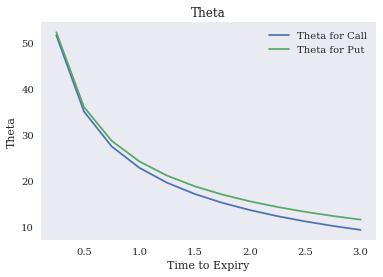

In [61]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

### Rho

In [62]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [63]:
rho(144.39, 150, 1, 0.0093, 0.0188, 0.928, 'call')

45.05417989169571

In [64]:
rho(144.39, 150, 1, 0.0093, 0.0188, 0.928, 'put')

-103.55728679604572

In [65]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(144.39, 150, 1, r[i], 0.0188, 0.928, 'call')
    Rho_Put [i] = rho(144.39, 150, 1, r[i], 0.0188, 0.928, 'put')

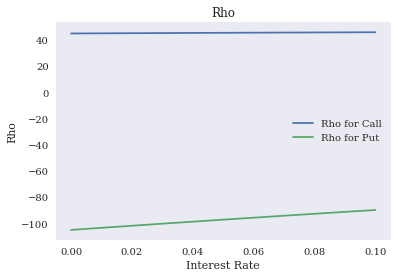

In [66]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])